# CVX

This example is from https://www.cvxpy.org/

In [2]:
import cvxpy as cp
import numpy as np

# Problem data.
m = 30
n = 20
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Construct the problem.
x = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A*x - b))
constraints = [0 <= x, x <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
# `constraint.dual_value`.
print(constraints[0].dual_value)


[-1.79109253e-19  2.85112420e-02  2.79973443e-19  3.37658751e-20
 -2.72802659e-19  1.49285011e-01 -9.97212062e-20  8.35373892e-20
  2.46718649e-01  5.78224144e-01 -4.03739462e-19  1.01242860e-03
 -9.28486200e-20  2.26767464e-01 -1.58813677e-19 -8.97232308e-20
 -1.22145726e-19 -1.51509432e-19  1.12060673e-19 -3.48318630e-19]
[ 2.50938945  0.          2.78354615  1.79425782 13.08579183  0.
  0.73716363  3.35344995  0.          0.          8.93825054  0.
  7.02955161  0.          4.71068649  3.18873635  2.06090107 10.08166738
  3.0481157   8.53268239]


# Sparse matrices

Sparse matrices https://docs.scipy.org/doc/scipy/reference/sparse.html

In [5]:
# dense to sparse
from numpy import array
from scipy.sparse import csr_matrix
# create dense matrix
A = array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)

from numpy import count_nonzero

sparsity = 1.0 - count_nonzero(A) / A.size
sparsity

[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


0.7222222222222222

In [6]:
docs = [["hello", "world", "hello"], ["goodbye", "cruel", "world"]]
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in docs:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
    indptr.append(len(indices))

# csr_matrix((data, indices, indptr), dtype=int).toarray()

array([[2, 1, 0, 0],
       [0, 1, 1, 1]])

# Clustering

https://machinelearningmastery.com/clustering-algorithms-with-python/

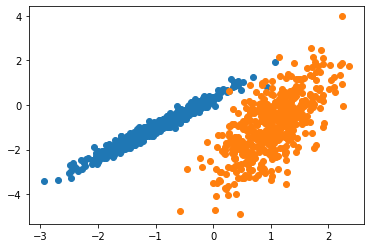

In [8]:
# synthetic classification dataset
from numpy import where
from sklearn.datasets import make_classification
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

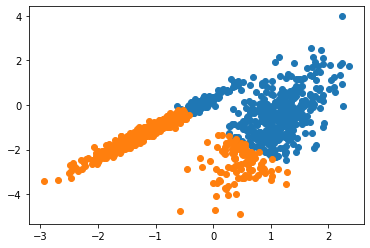

In [9]:
# k-means clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = KMeans(n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
yhat = model.predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

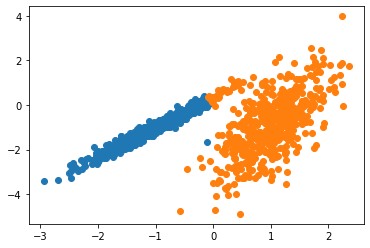

In [10]:
# spectral clustering https://papers.nips.cc/paper/2092-on-spectral-clustering-analysis-and-an-algorithm.pdf
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
# define dataset
X, _ = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# define the model
model = SpectralClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

# Least-squares fitting

Fit a line, y = mx + c, through some noisy data-points

See https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html

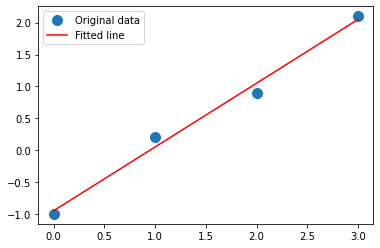

In [63]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond=None)[0]
m, c

import matplotlib.pyplot as plt
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

# Phantom

## Utility functions

In [1]:
## Copyright (C) 2010  Alex Opie  <lx_op@orcon.net.nz>
##
## This program is free software; you can redistribute it and/or modify it
## under the terms of the GNU General Public License as published by
## the Free Software Foundation; either version 3 of the License, or (at
## your option) any later version.
##
## This program is distributed in the hope that it will be useful, but
## WITHOUT ANY WARRANTY; without even the implied warranty of
## MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.	See the GNU
## General Public License for more details.
##
## You should have received a copy of the GNU General Public License
## along with this program; see the file COPYING.  If not, see
## <http://www.gnu.org/licenses/>.

import numpy as np

def phantom (n = 256, p_type = 'Modified Shepp-Logan', ellipses = None):
	"""
	 phantom (n = 256, p_type = 'Modified Shepp-Logan', ellipses = None)
	
	Create a Shepp-Logan or modified Shepp-Logan phantom.

	A phantom is a known object (either real or purely mathematical) 
	that is used for testing image reconstruction algorithms.  The 
	Shepp-Logan phantom is a popular mathematical model of a cranial
	slice, made up of a set of ellipses.  This allows rigorous 
	testing of computed tomography (CT) algorithms as it can be 
	analytically transformed with the radon transform (see the 
	function `radon').
	
	Inputs
	------
	n : The edge length of the square image to be produced.
	
	p_type : The type of phantom to produce. Either 
	  "Modified Shepp-Logan" or "Shepp-Logan".  This is overridden
	  if `ellipses' is also specified.
	
	ellipses : Custom set of ellipses to use.  These should be in 
	  the form
	  	[[I, a, b, x0, y0, phi],
	  	 [I, a, b, x0, y0, phi],
	  	 ...]
	  where each row defines an ellipse.
	  I : Additive intensity of the ellipse.
	  a : Length of the major axis.
	  b : Length of the minor axis.
	  x0 : Horizontal offset of the centre of the ellipse.
	  y0 : Vertical offset of the centre of the ellipse.
	  phi : Counterclockwise rotation of the ellipse in degrees,
	        measured as the angle between the horizontal axis and 
	        the ellipse major axis.
	  The image bounding box in the algorithm is [-1, -1], [1, 1], 
	  so the values of a, b, x0, y0 should all be specified with
	  respect to this box.
	
	Output
	------
	P : A phantom image.
	
	Usage example
	-------------
	  import matplotlib.pyplot as pl
	  P = phantom ()
	  pl.imshow (P)
	
	References
	----------
	Shepp, L. A.; Logan, B. F.; Reconstructing Interior Head Tissue 
	from X-Ray Transmissions, IEEE Transactions on Nuclear Science,
	Feb. 1974, p. 232.
	
	Toft, P.; "The Radon Transform - Theory and Implementation", 
	Ph.D. thesis, Department of Mathematical Modelling, Technical 
	University of Denmark, June 1996.
	
	"""
	
	if (ellipses is None):
		ellipses = _select_phantom (p_type)
	elif (np.size (ellipses, 1) != 6):
		raise AssertionError ("Wrong number of columns in user phantom")
	
	# Blank image
	p = np.zeros ((n, n))

	# Create the pixel grid
	ygrid, xgrid = np.mgrid[-1:1:(1j*n), -1:1:(1j*n)]

	for ellip in ellipses:
		I   = ellip [0]
		a2  = ellip [1]**2
		b2  = ellip [2]**2
		x0  = ellip [3]
		y0  = ellip [4]
		phi = ellip [5] * np.pi / 180  # Rotation angle in radians
		
		# Create the offset x and y values for the grid
		x = xgrid - x0
		y = ygrid - y0
		
		cos_p = np.cos (phi) 
		sin_p = np.sin (phi)
		
		# Find the pixels within the ellipse
		locs = (((x * cos_p + y * sin_p)**2) / a2 
              + ((y * cos_p - x * sin_p)**2) / b2) <= 1
		
		# Add the ellipse intensity to those pixels
		p [locs] += I

	return p


def _select_phantom (name):
	if (name.lower () == 'shepp-logan'):
		e = _shepp_logan ()
	elif (name.lower () == 'modified shepp-logan'):
		e = _mod_shepp_logan ()
	else:
		raise ValueError ("Unknown phantom type: %s" % name)
	
	return e


def _shepp_logan ():
	#  Standard head phantom, taken from Shepp & Logan
	return [[   2,   .69,   .92,    0,      0,   0],
	        [-.98, .6624, .8740,    0, -.0184,   0],
	        [-.02, .1100, .3100,  .22,      0, -18],
	        [-.02, .1600, .4100, -.22,      0,  18],
	        [ .01, .2100, .2500,    0,    .35,   0],
	        [ .01, .0460, .0460,    0,     .1,   0],
	        [ .02, .0460, .0460,    0,    -.1,   0],
	        [ .01, .0460, .0230, -.08,  -.605,   0],
	        [ .01, .0230, .0230,    0,  -.606,   0],
	        [ .01, .0230, .0460,  .06,  -.605,   0]]

def _mod_shepp_logan ():
	#  Modified version of Shepp & Logan's head phantom, 
	#  adjusted to improve contrast.  Taken from Toft.
	return [[   1,   .69,   .92,    0,      0,   0],
	        [-.80, .6624, .8740,    0, -.0184,   0],
	        [-.20, .1100, .3100,  .22,      0, -18],
	        [-.20, .1600, .4100, -.22,      0,  18],
	        [ .10, .2100, .2500,    0,    .35,   0],
	        [ .10, .0460, .0460,    0,     .1,   0],
	        [ .10, .0460, .0460,    0,    -.1,   0],
	        [ .10, .0460, .0230, -.08,  -.605,   0],
	        [ .10, .0230, .0230,    0,  -.606,   0],
	        [ .10, .0230, .0460,  .06,  -.605,   0]]

#def ?? ():
#	# Add any further phantoms of interest here
#	return np.array (
#	 [[ 0, 0, 0, 0, 0, 0],
#	  [ 0, 0, 0, 0, 0, 0]])

## Example

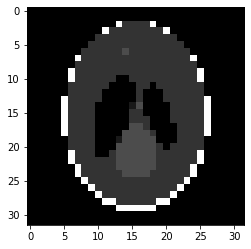

In [2]:
import matplotlib.pyplot as plt

w = 32

I = phantom(n=w)
imgplot = plt.imshow(I, cmap='gray')
imgplot

In [3]:
import numpy as np

x = np.ndarray.flatten(I)

n = len(x)
m = int(.7 * n)
print(m, n)

A = np.random.rand(m, n)

b = A.dot(x)

716 1024


In [4]:
y = np.linalg.solve(A, b)

LinAlgError: ignored

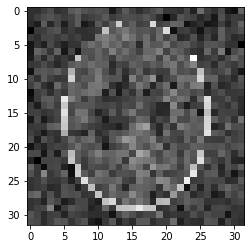

In [5]:
y = np.linalg.lstsq(A, b, rcond=None)[0]

y = np.resize(y, (w,w))

plt.imshow(y, cmap='gray')

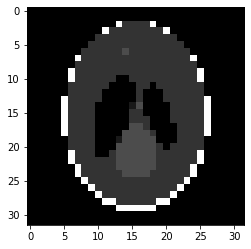

In [7]:
import cvxpy as cp

# Construct the problem.
z = cp.Variable(n)
objective = cp.Minimize(cp.sum_squares(A*z - b))
constraints = [0 <= z]  # can also try [0 <= z, z <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
plt.imshow(np.resize(z.value, (w,w)), cmap='gray')

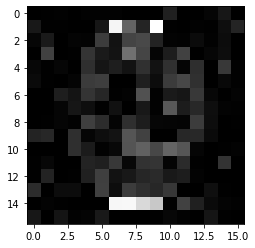

In [73]:
import cvxpy as cp

# Construct the problem.
z = cp.Variable(n)
objective = cp.Minimize(cp.norm1(A*z - b))
constraints = [0 <= z, z <= 1]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
plt.imshow(np.resize(z.value, (16,16)), cmap='gray')